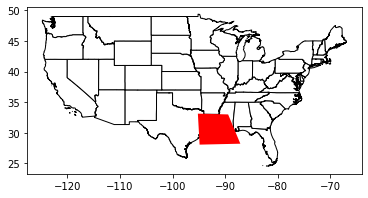

In [211]:
import geopandas as gpd
import numpy as np

shapefile = gpd.read_file(r"Z:\GIS\StageIv Boundary.shp")
conus = gpd.read_file("Z:\GIS\CONUS.shp")
base = conus.plot(color='white', edgecolor='black')
shapefile.plot(ax=base, marker='o', color='red', markersize=5);

<AxesSubplot:title={'center':'ST4.2005082913.01h Cumulative Precip (mm)'}>

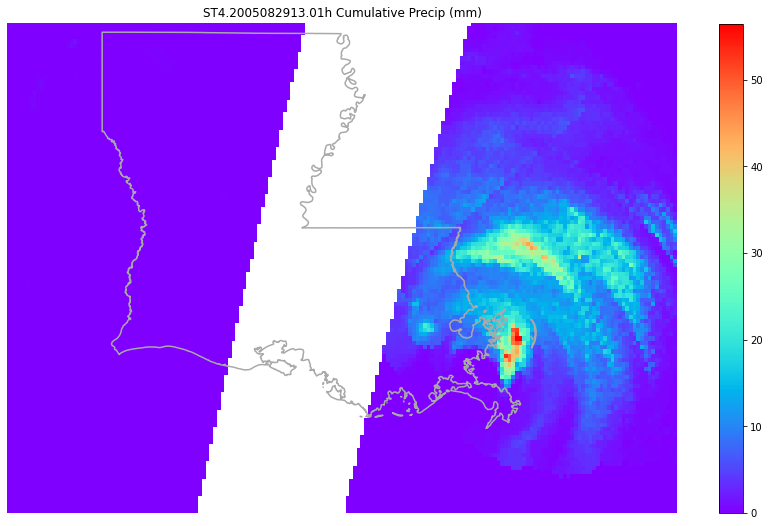

In [212]:

import matplotlib.pyplot as plt
import rasterio
import rasterio.plot
fig, ax = plt.subplots(figsize=(15, 15))
la = gpd.read_file("Z:\GIS\Louisiana.shp")
bbox = la.total_bounds
la_extent=bbox[[0,2,1,3]]

bbox_lwi = shapefile.total_bounds
lwi_extent = bbox_lwi[[0,2,1,3]]
fn = r"Z:\LWI_StageIV\Hurricane Katrina 2005\projected\ST4.2005082913.01h"
title = fn.split('\\')[-1]
raster = rasterio.open(fn)

# raster.window?
raster_window = raster.window(*bbox_lwi)
array = raster.read(1, window=raster_window)
array[array==raster.nodata] = np.nan
im = plt.imshow(array, extent=lwi_extent, cmap='rainbow')
cb = plt.colorbar(im, shrink=.6)
ax.set(title=f"{title} Cumulative Precip (mm)")
ax.set_axis_off()
la.boundary.plot(ax=plt.gca(), color='darkgrey')

In [213]:
import rasterstats

# window_transform = raster.window_transform(raster_window)

stats = rasterstats.zonal_stats(r"Z:\GIS\StageIv Boundary.shp", fn, stats=['min', 'max','mean', 'count', 'nodata'])
percentMissing = stats[0]['nodata']/stats[0]['count']
percentMissing = round(percentMissing * 100, 2)
percentMissing

37.95